In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import plot_tree

from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')



In [3]:
#Data reading 
Phy_Che = pd.read_pickle('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.pkl')
display(Phy_Che)

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Aquatic_500.t,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,-0.635657,-0.402250,0.910612,-0.067940,-0.654950,0.000000,-0.570731,0.899016,-0.067940,-2.393980
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,0.849086,-0.459558,1.063622,-0.346234,0.579132,0.210428,-0.639147,1.052930,-0.346234,0.318639
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,-0.635657,0.357345,0.357345,-0.036563,-0.183805,0.000000,0.271036,0.341070,-0.036563,-0.718868
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,1.120502,-0.152026,0.413601,0.459558,0.078412,0.593821,-0.282875,0.397935,0.459558,-0.318639
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,-0.635657,-0.026114,0.269558,0.591528,-0.554602,0.000000,-0.142907,0.252250,0.591528,-1.618497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,Spring,7.880,...,-0.635657,-1.731664,-0.776422,1.665398,-1.150349,0.000000,0.000000,-0.822105,1.665398,0.000000
237,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,Spring,7.800,...,-0.635657,-1.731664,-0.194437,1.343325,-1.150349,0.000000,0.000000,-0.219486,1.343325,0.000000
238,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,Spring,9.610,...,-0.635657,-0.335166,-1.181259,1.369531,-0.390951,0.000000,-0.491989,-1.260117,1.369531,-1.123769
239,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,Spring,8.470,...,-0.635657,-0.324138,-0.604016,1.140287,-1.150349,0.000000,-0.479169,-0.641518,1.140287,0.000000


### Eco regions

In [4]:
# Mediterranean ponds Spain; Temperature ponds Belgium, Germany, Switzerland, Denmark and UK; Continental Turkey; Subtropical Uruguay
region='Uruguay'
Phy_Che_Medi=Phy_Che[Phy_Che['Country']==f'{region}']
display(Phy_Che_Medi)

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Aquatic_500.t,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
212,URG001,SCL1,-54.878042,-34.537517,Sierra de los Caracoles,Uruguay,1,1,Spring,7.38,...,-0.635657,-1.731664,-0.078412,1.224315,-1.150349,0.000000,0.000000,-0.101074,1.224315,0.000000
213,URG002,SCL2,-54.876078,-34.533836,Sierra de los Caracoles,Uruguay,1,1,Spring,8.81,...,-0.635657,-1.731664,-0.313150,1.424967,-1.150349,0.000000,0.000000,-0.341070,1.424967,0.000000
214,URG003,SCL3,-54.879586,-34.537597,Sierra de los Caracoles,Uruguay,1,1,Spring,7.87,...,-0.635657,-1.731664,-0.015667,1.202508,-1.150349,0.000000,0.000000,-0.037183,1.202508,0.000000
215,URG004,SCH1,-54.864431,-34.577464,Sierra de los Caracoles,Uruguay,1,1,Spring,5.97,...,-0.635657,-0.357345,-0.959117,1.246720,-0.413601,0.000000,-0.517875,-1.016646,1.246720,-1.177769
216,URG005,SCH2,-54.865783,-34.579558,Sierra de los Caracoles,Uruguay,1,1,Spring,7.71,...,-0.635657,-0.302199,-0.616598,1.120502,-0.402250,0.000000,-0.453762,-0.654621,1.120502,-1.150349
217,URG006,SCH3,-54.872100,-34.568611,Sierra de los Caracoles,Uruguay,1,1,Spring,6.90,...,-0.635657,-0.975794,-1.045410,1.925501,-1.150349,0.000000,-1.349200,-1.110116,1.925501,0.000000
218,URG007,LPL1,-54.188836,-34.533019,La Pedrera,Uruguay,1,0,Spring,7.36,...,-0.635657,-0.776422,-0.642061,1.485165,-0.247958,0.000000,-1.046231,-0.681172,1.485165,-0.831740
219,URG008,LPL2,-54.202039,-34.528714,La Pedrera,Uruguay,1,0,Spring,7.84,...,-0.635657,-1.731664,-1.551285,2.497705,-1.150349,0.000000,0.000000,-1.700787,2.497705,0.000000
220,URG009,LPL3,-54.191225,-34.535647,La Pedrera,Uruguay,1,0,Spring,7.26,...,-0.635657,-0.194437,-0.707644,1.045410,-0.494670,0.000000,-0.330650,-0.749776,1.045410,-1.401344
221,URG010,LPH1,-54.189594,-34.521639,La Pedrera,Uruguay,1,0,Spring,7.67,...,-0.635657,-0.819502,-1.624981,2.181227,-1.150349,0.000000,-1.107259,-1.798904,2.181227,0.000000


In [5]:
vars=['Pond_ID', 'PondCode', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col','Area.t', 'Depth.t','TN', 'TP','bio1.t', 'bio4.t', 'bio5.t','bio12.t','Hydeoperiod_length.t',
       'Animals_cont.t', 'Natural_5.t','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt',]
Phy_Che_random_forest_df = Phy_Che_Medi[vars]
display(Phy_Che_random_forest_df)

,Pond_ID,PondCode,Pondscape,Country,Strat_Survey,Resampling,season_col,Area.t,Depth.t,TN,...,bio5.t,bio12.t,Hydeoperiod_length.t,Animals_cont.t,Natural_5.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt
212,URG001,SCL1,Sierra de los Caracoles,Uruguay,1,1,Spring,6.691614,0.992747,0.58,...,0.542462,0.566825,0.487558,0.390951,NaN,0.000000,0.000000,-0.101074,1.224315,0.000000
213,URG002,SCL2,Sierra de los Caracoles,Uruguay,1,1,Spring,7.392790,0.530402,0.44,...,0.542462,0.566825,0.487558,0.390951,-0.823820,0.000000,0.000000,-0.341070,1.424967,0.000000
214,URG003,SCL3,Sierra de los Caracoles,Uruguay,1,1,Spring,6.006704,0.834203,0.37,...,0.542462,0.566825,0.487558,0.390951,-0.823820,0.000000,0.000000,-0.037183,1.202508,0.000000
215,URG004,SCH1,Sierra de los Caracoles,Uruguay,1,1,Spring,7.410837,-0.776422,0.89,...,0.542462,0.566825,0.487558,1.454408,-1.233007,0.000000,-0.517875,-1.016646,1.246720,-1.177769
216,URG005,SCH2,Sierra de los Caracoles,Uruguay,1,1,Spring,7.226675,-0.748487,0.75,...,0.542462,0.566825,0.487558,1.454408,-1.233007,0.000000,-0.453762,-0.654621,1.120502,-1.150349
217,URG006,SCH3,Sierra de los Caracoles,Uruguay,1,1,Spring,7.033093,-1.045410,0.90,...,0.542462,0.566825,0.487558,1.454408,-0.557178,0.000000,-1.349200,-1.110116,1.925501,0.000000
218,URG007,LPL1,La Pedrera,Uruguay,1,0,Spring,8.773075,1.587056,0.46,...,-0.419296,0.984235,0.487558,2.036834,0.415434,0.000000,-1.046231,-0.681172,1.485165,-0.831740
219,URG008,LPL2,La Pedrera,Uruguay,1,0,Spring,8.410943,1.027539,0.79,...,-0.419296,0.984235,0.487558,1.454408,-1.098545,0.000000,0.000000,-1.700787,2.497705,0.000000
220,URG009,LPL3,La Pedrera,Uruguay,1,0,Spring,7.535831,0.776422,1.31,...,-0.419296,0.984235,0.487558,1.454408,-1.098545,0.000000,-0.330650,-0.749776,1.045410,-1.401344
221,URG010,LPH1,La Pedrera,Uruguay,1,0,Spring,8.421563,1.160529,0.88,...,-0.419296,0.984235,0.487558,0.942702,-1.753607,0.000000,-1.107259,-1.798904,2.181227,0.000000


In [6]:
#UK lancaster has NA values for both TP and TP
Phy_Che_random_forest_df.dropna(inplace=True)

/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_71907/1573237295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Phy_Che_random_forest_df.dropna(inplace=True)


## TP tree

In [7]:
dependent_var='TP'

### TP Tree full and k-fold validation

In [8]:
# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area.t', 'Depth.t','bio1.t', 'bio4.t', 'bio5.t','bio12.t','Hydeoperiod_length.t',
       'Animals_cont.t', 'Natural_5.t','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_random_forest_df[f'{dependent_var}']


In [9]:

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True,max_depth=4)
#ccp_alpha=0.01)
 
# Fit the regressor with x and y data
regressor.fit(X, y)

RandomForestRegressor(max_depth=4, n_estimators=10, oob_score=True,
                      random_state=0)

In [10]:
print('Parameters currently in use:\n')
print(regressor.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 10, 'n_jobs': None, 'oob_score': True, 'random_state': 0, 'verbose': 0, 'warm_start': False}


#### Fitting and evaluating the model

In [11]:
print(f"{dependent_var} RF Decision Tree in {region} build from the whole dataset")

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {round(oob_score,2)}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {round(mse,2)}')

r2 = r2_score(y, predictions)
print(f'R-squared:{round(r2,2)}')


TP RF Decision Tree in Uruguay build from the whole dataset
Out-of-Bag Score: -0.35
Mean Squared Error: 0.03
R-squared:0.75


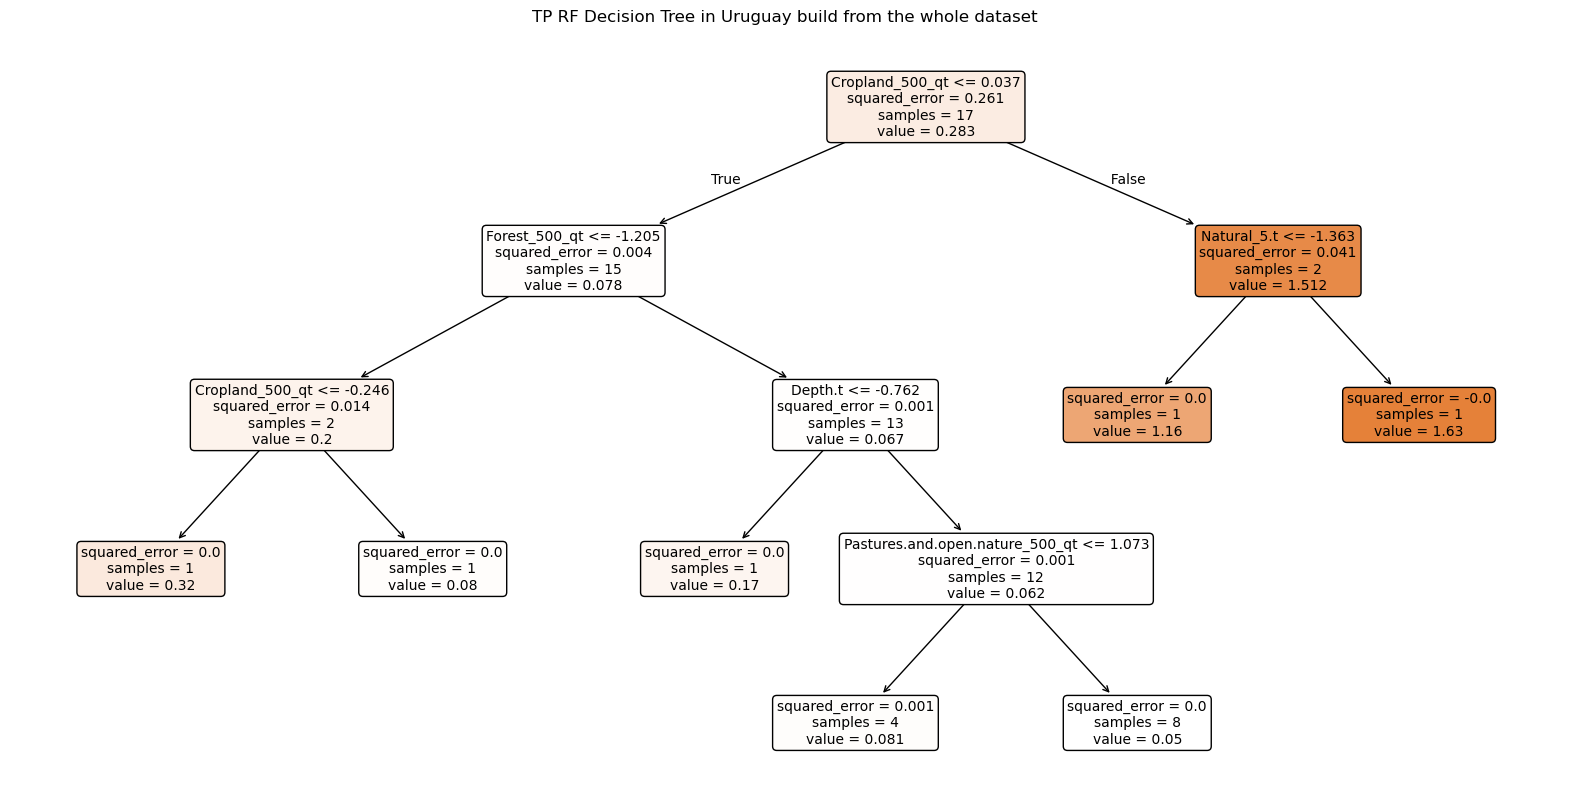

In [12]:

# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title(f"{dependent_var} RF Decision Tree in {region} build from the whole dataset")
plt.show()


In [28]:
print(f"k-fold {dependent_var} RF Decision Tree in {region} build from the whole dataset")

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores  # Since cross_val_score returns negative MSE
print(f'MSE scores for each fold: {mse_scores}')
print(f'Average MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of MSE: {np.std(mse_scores)}')


k-fold TN RF Decision Tree in Uruguay build from the whole dataset
MSE scores for each fold: [0.32071578 0.05531277 0.36726721 0.04654441 0.09606148]
Average MSE: 0.1771803302901152
Standard Deviation of MSE: 0.13800953793664883


/Users/lidiayung/miniforge3/envs/cstar/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/lidiayung/miniforge3/envs/cstar/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


#### TP tree and test/train(0.2/0.8)

In [29]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True,max_depth=4)
#ccp_alpha=0.01)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=10, oob_score=True,
                      random_state=0)

In [31]:
print(f"{dependent_var} RF Decision Tree in {region} test/train")

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {round(oob_score,2)}')

# Making predictions on the same data or new data
predictions = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {round(mse,2)}')

r2 = r2_score(y_test, predictions)
print(f'R-squared:{round(r2,2)}')


TN RF Decision Tree in Uruguay test/train
Out-of-Bag Score: -0.25
Mean Squared Error: 0.29
R-squared:-0.44


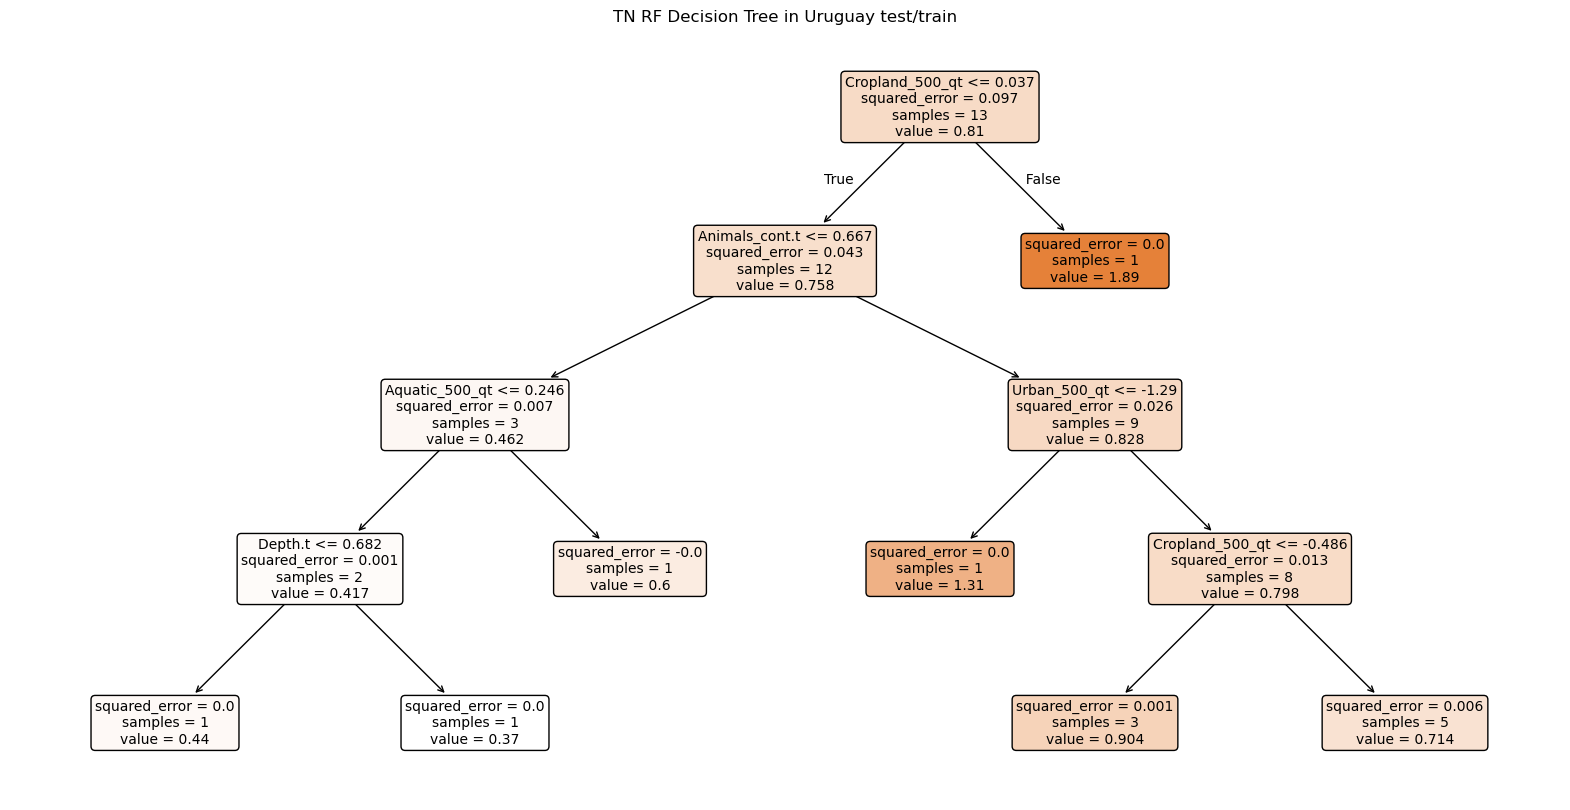

In [32]:
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title(f"{dependent_var} RF Decision Tree in {region} test/train")
plt.show()


## TN tree

In [33]:
dependent_var='TN'

### TN tree and k-fold validation

In [34]:

# Split the data into features (X) and target (y)
X = Phy_Che_random_forest_df[['Area.t', 'Depth.t','bio1.t', 'bio4.t', 'bio5.t','bio12.t','Hydeoperiod_length.t',
       'Animals_cont.t', 'Natural_5.t','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt','Urban_500_qt']]

y = Phy_Che_random_forest_df[f'{dependent_var}']

In [35]:
regressor.fit(X,y)

RandomForestRegressor(max_depth=4, n_estimators=10, oob_score=True,
                      random_state=0)

#### Fitting and evaluating the model

In [36]:
print(f"{dependent_var} RF Decision Tree in {region} from whole dataset")

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {round(oob_score,2)}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {round(mse,2)}')

r2 = r2_score(y, predictions)
print(f'R-squared:{round(r2,2)}')


TN RF Decision Tree in Uruguay from whole dataset
Out-of-Bag Score: -0.12
Mean Squared Error: 0.03
R-squared:0.82


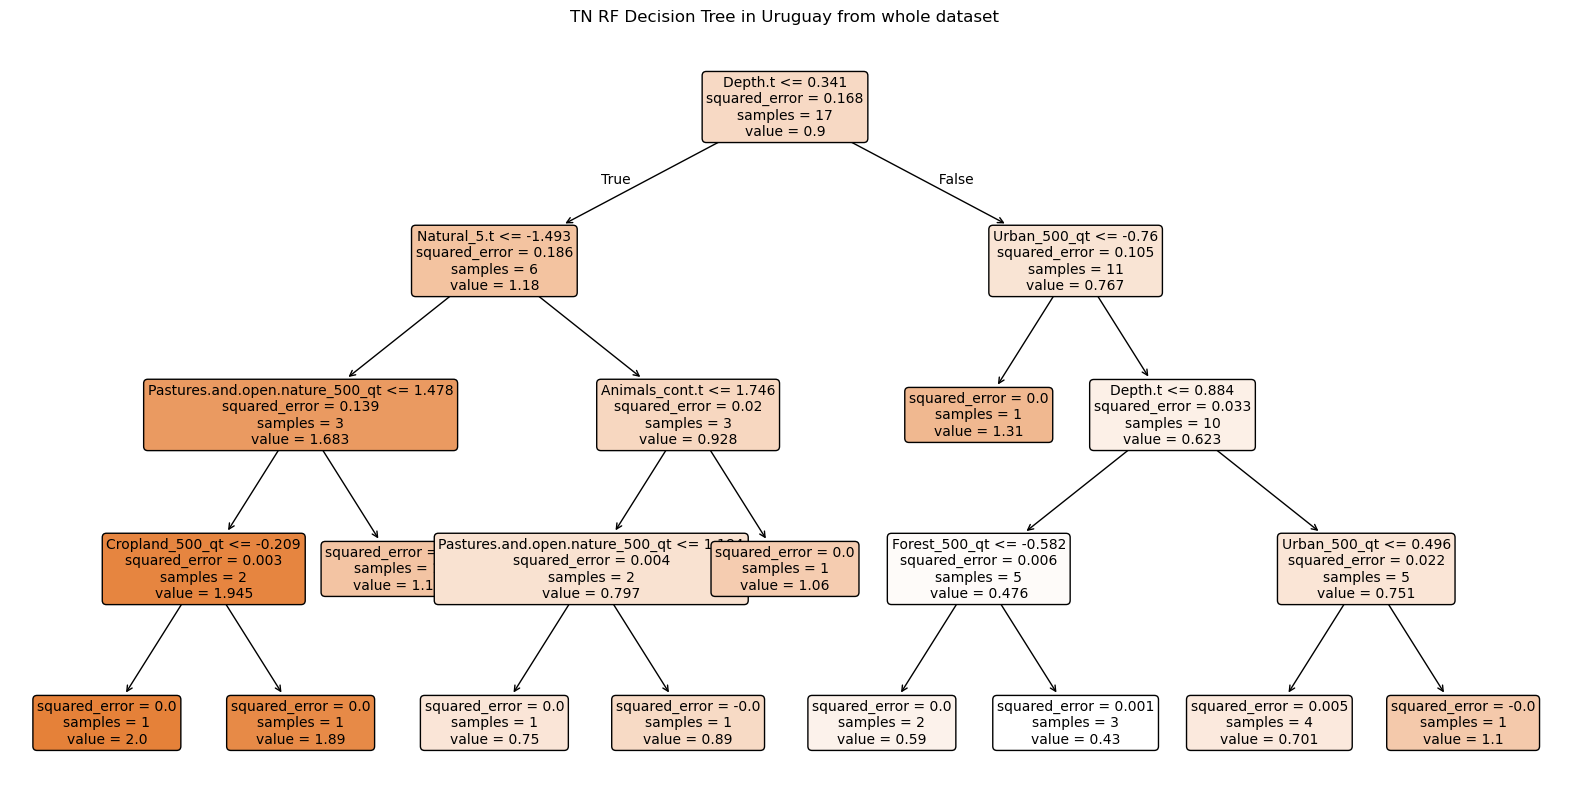

In [22]:
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title(f"{dependent_var} RF Decision Tree in {region} from whole dataset")
plt.show()


In [37]:
print(f"k-fold {dependent_var} RF Decision Tree in {region} build from the whole dataset")

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -scores  # Since cross_val_score returns negative MSE
print(f'MSE scores for each fold: {mse_scores}')
print(f'Average MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of MSE: {np.std(mse_scores)}')


k-fold TN RF Decision Tree in Uruguay build from the whole dataset
MSE scores for each fold: [0.32071578 0.05531277 0.36726721 0.04654441 0.09606148]
Average MSE: 0.1771803302901152
Standard Deviation of MSE: 0.13800953793664883


/Users/lidiayung/miniforge3/envs/cstar/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/lidiayung/miniforge3/envs/cstar/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


### TN tree and test/train(0.2/0.8)

TN RF Decision Tree in Uruguay test/train
Out-of-Bag Score: -0.92
Mean Squared Error: 0.17
R-squared:0.18


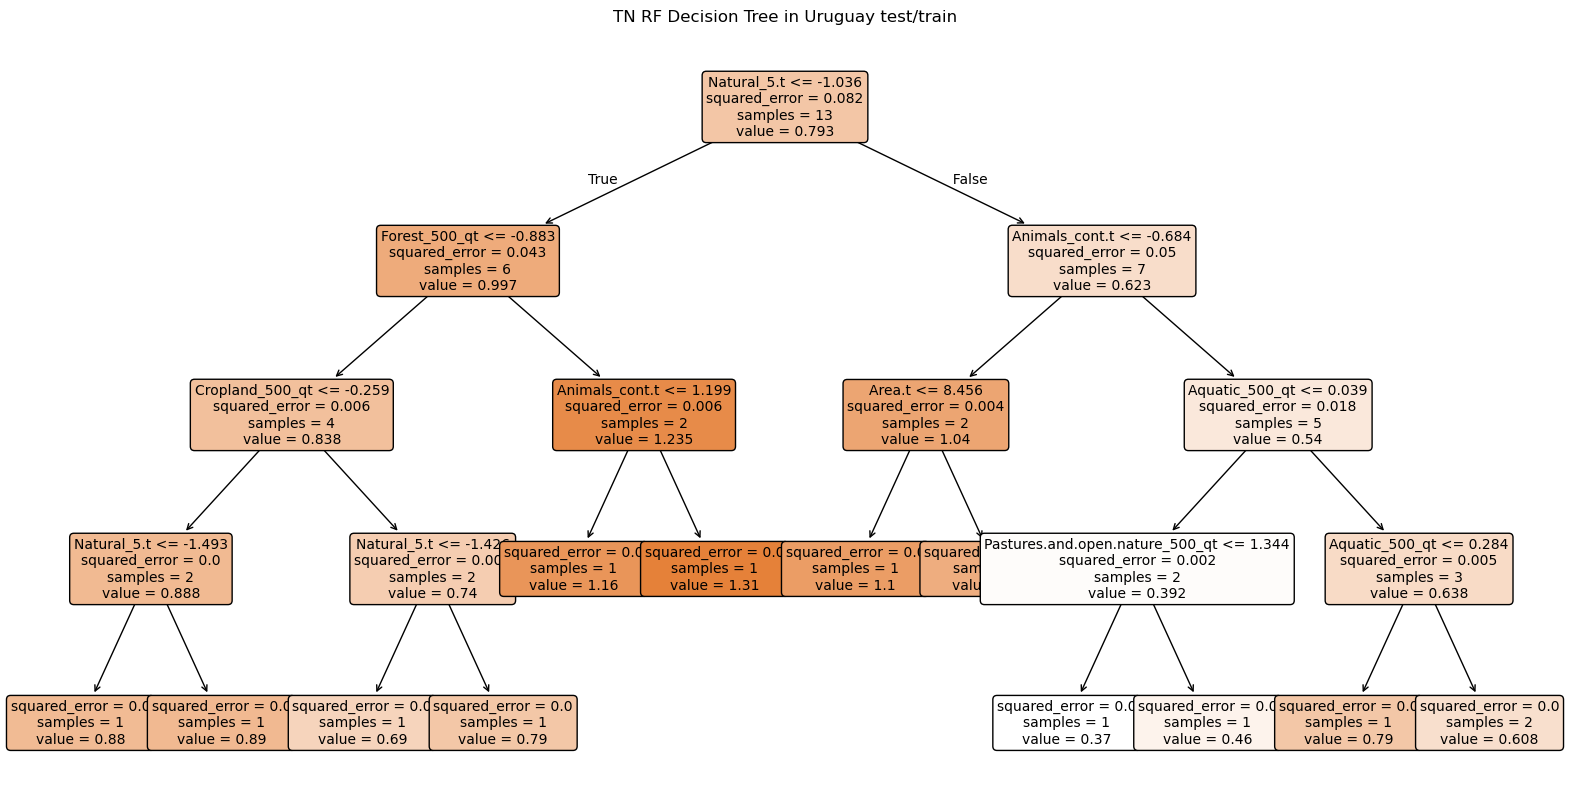

In [39]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True,max_depth=4)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

# Evaluating the model
print(f"{dependent_var} RF Decision Tree in {region} test/train")

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {round(oob_score,2)}')

# Making predictions on the same data or new data
predictions = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {round(mse,2)}')

r2 = r2_score(y_test, predictions)
print(f'R-squared:{round(r2,2)}')



# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title(f"{dependent_var} RF Decision Tree in {region} test/train" )
plt.show()